This script tries to check the data quality using the PSD methods;

The PSD of data collected from Ruijin is very strange, therefor I want to compare it with data collected from Huasha;

Turns out I can't find any obvious difference between PSDs of these two datasets.

In [1]:
from gesture.config import *

import hdf5storage
import os
import numpy as np
import matplotlib.pyplot as plt
from mne.time_frequency import tfr_morlet
from mne.time_frequency import tfr_array_morlet

from gesture.config import *
from gesture.preprocess.chn_settings import get_channel_setting


pre_all: Running from CMD.
common_dl.py: Using CUDA.


In [2]:
sid=10
input_dir=data_dir+'preprocessing/P'+str(sid)+'/preprocessing2.mat'
Session_num,UseChn,EmgChn,TrigChn = get_channel_setting(sid)
#original_fs=[Frequencies[i,1] for i in range(Frequencies.shape[0]) if Frequencies[i,0] == pn][0]
fs=1000
if sid==11 or sid==12:
    fs=500
mat=hdf5storage.loadmat(input_dir)
data = mat['Datacell']
good_channels=mat['good_channels']
channelNum=len(np.squeeze(good_channels))
data=np.concatenate((data[0,0],data[0,1]),0)
del mat

In [3]:
# stim0 is trigger channel, stim1 is trigger position calculated from EMG signal.
chn_names=np.append(["seeg"]*channelNum,["emg0","emg1","stim_trigger","stim_emg"])
chn_types=np.append(["seeg"]*channelNum,["emg","emg","stim","stim"])
info = mne.create_info(ch_names=list(chn_names), ch_types=list(chn_types), sfreq=fs)
raw = mne.io.RawArray(data.transpose(), info)


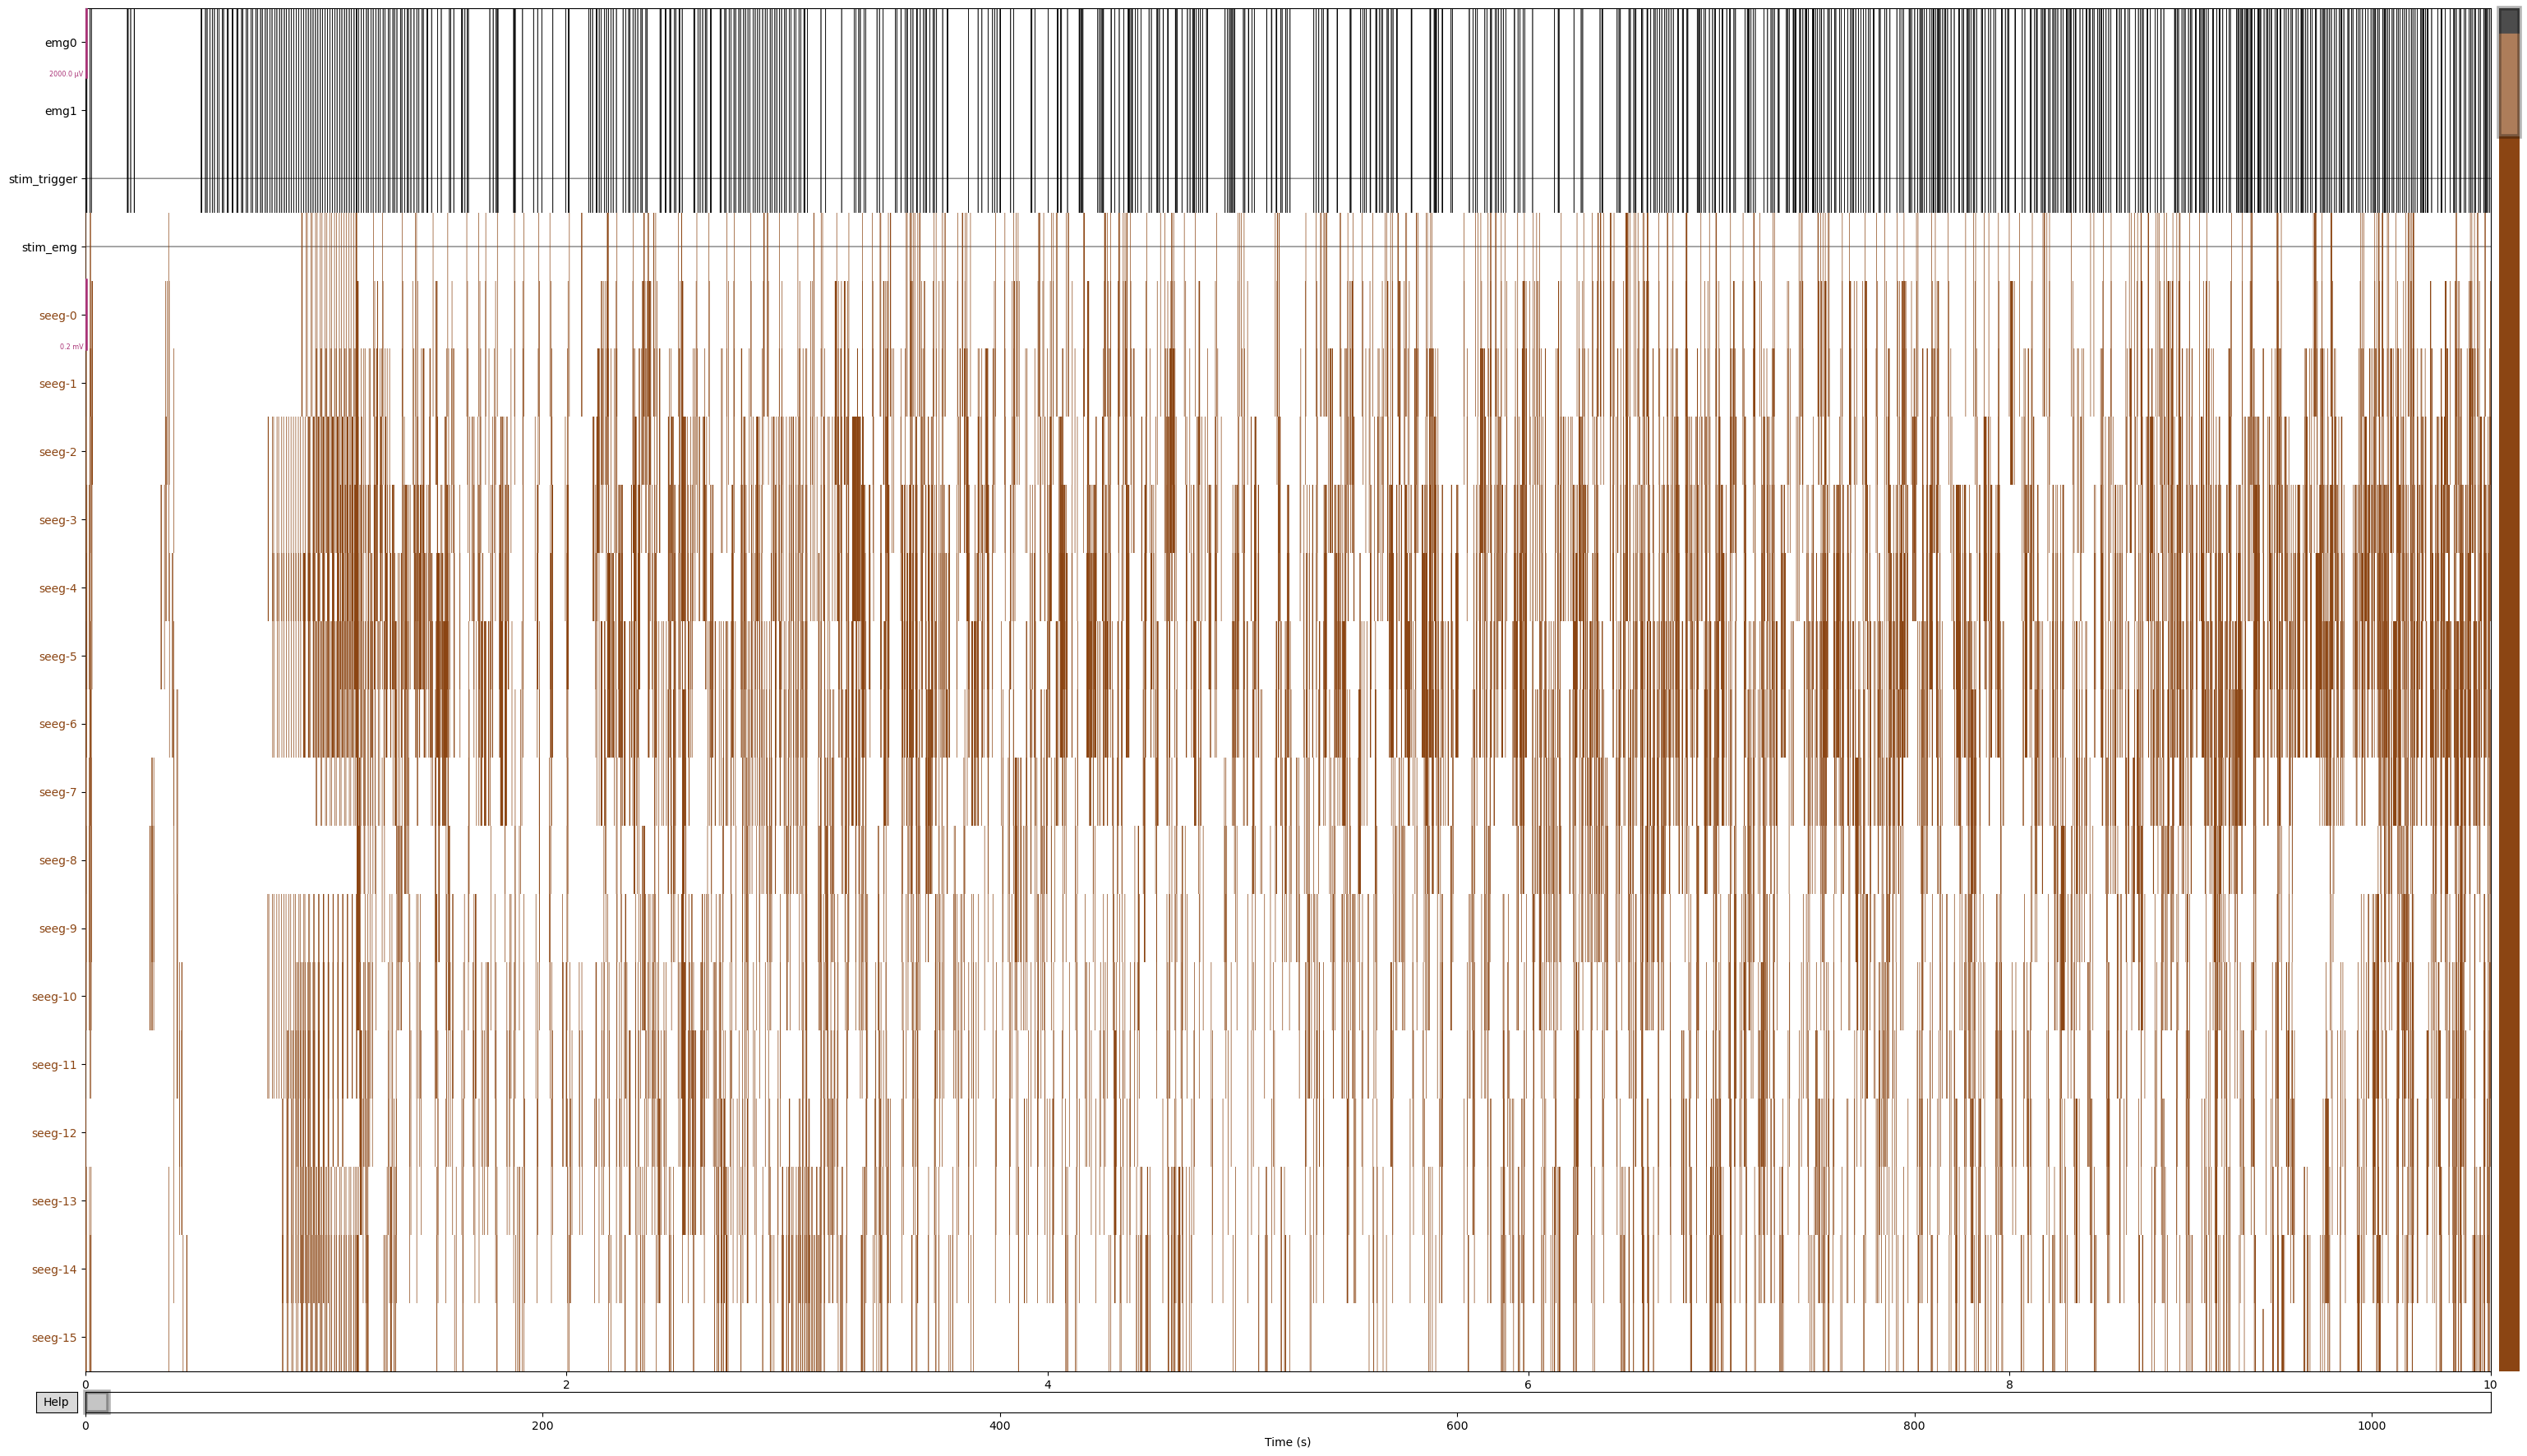

In [5]:
%matplotlib qt
raw.plot()

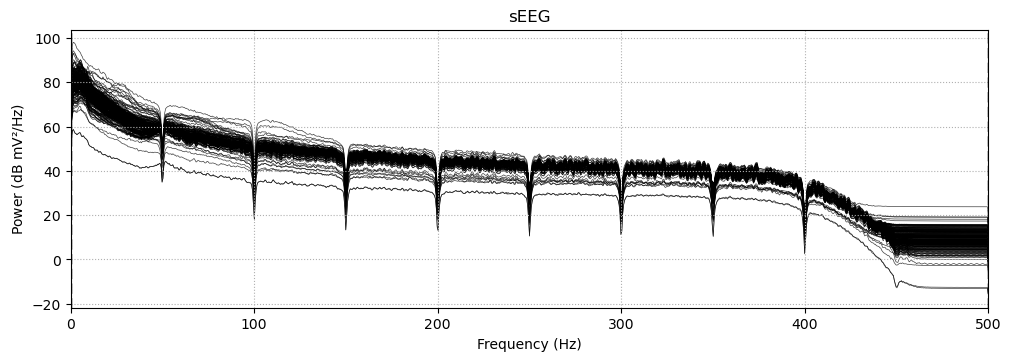

In [4]:
%matplotlib qt
raw.compute_psd().plot()